In [1]:
import numpy as np
import cvxpy as cp
from typing import List
from scipy.spatial import distance_matrix
import scipy.stats as ss
import ot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import utils

# Gaussian example

In [ ]:
nsamples = 100

P1 = utils.disc_gauss_generator(nsamples, 30, 3, plotting = True)
P2 = utils.disc_gauss_generator(nsamples, 50, 3)
P3 = utils.disc_gauss_generator(nsamples, 1000, 3)
P4 = utils.disc_gauss_generator(nsamples, 1200, 3)

# MNIST

In [25]:
mnist = pd.read_csv('mnist_test.csv')
mnist

In [108]:
# list of pd.DataFrames(each is a digit)
digit_list = []
for i in range(10):
    a = mnist[mnist["label"] == i]
    digit_list.append(a)


# create X: pixel positions(x,y) -- this is same for all images
x_temp = np.arange(28) + 1
support = np.array(np.meshgrid(x_temp,x_temp)).T.reshape(-1,2)

# Save into list (first index is digit, second is sample_number)
digits = []
for i in range(10):
    
    thisdigit = np.array(digit_list[i])
    digits_temp = []
    
    for j in range(len(thisdigit)):
        w_temp = np.array(thisdigit[j,1:])
        w_temp = w_temp/w_temp.sum()
        digits_temp.append(utils.DiscreteDistrib(w_temp, support))
        
    digits.append(digits_temp)

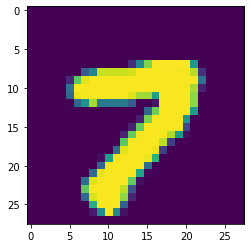

In [113]:
tmp = digits[7][10].w.reshape((28,28))
plt.imshow(tmp)

In [115]:
test_set = [digits[0][0], digits[0][3],
           digits[3][0], digits[3][3],
           digits[9][0], digits[9][3],]

utils.clustering(test_set, K=3, numItermax = 100)

[2, 2, 2, 2, 2, 2]